In [1]:
import cv2
from character_detector import character_detector, CharacterTransformer
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import pickle
from parser_and_solver import parse_and_solve

In [2]:
def characters_plot(characters):
    plt.figure(figsize=(13, 2))
    for i in range(len(characters)):
        plt.subplot(1, len(characters), i + 1)
        plt.imshow(characters[i])
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()

## Character detection from uploaded image

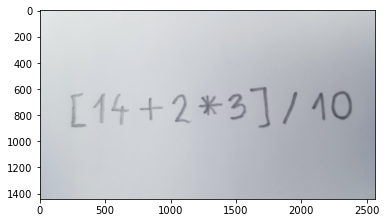

In [3]:
img = cv2.imread('equations/Capture7.jpg')
plt.imshow(img)
plt.show()

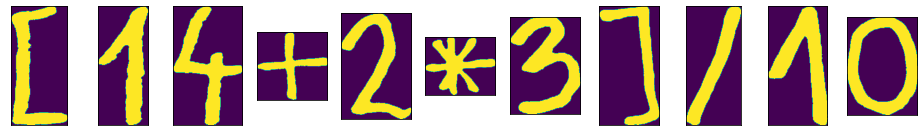

In [4]:
characters = character_detector(img)
characters_plot(characters)

## Transforming characters to look similar as characters from training set

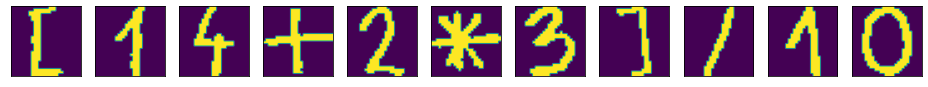

In [5]:
dim = 28
transformer = CharacterTransformer(dim)
chars=transformer.transform(characters)

characters_plot(chars)

## Predictions with saved model

In [6]:
model = load_model('models/model_1.h5')
with open("codes", "rb") as fp:   
    codes = pickle.load(fp)

In [7]:
#Predicting entire equation
equation=""
for i in range(len(chars)):
    prediction = model.predict(chars[i].reshape((dim,dim,1))[np.newaxis])
    label=codes[np.argmax(prediction)]
    equation+=label
equation

'[14+2*3]/10'

## Evaluating equation


In [8]:
#For evaluation we change brackets with parentheses
equation=equation.replace('[','(').replace(']',')')
equation

'(14+2*3)/10'

In [9]:
#Evaluation
print(f'{equation} = {parse_and_solve(equation)}')

(14+2*3)/10 = 2.0
